In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
%matplotlib inline
sns.set(style="darkgrid" )

In [ ]:
prob = pd.read_csv('ClassificationProblem1.txt', delimiter = '\t', index_col = 'Index', parse_dates = ['F15', 'F16'])
prob['F23']=(prob.F15-prob.F16).astype('timedelta64[D]')
prob_data = prob.drop(['F15', 'F16', 'C'], axis = 1)
scaler = MinMaxScaler(feature_range=(-1,1))
prob_data_scaled = pd.DataFrame(scaler.fit_transform(prob_data), columns=prob_data.columns)
prob_data_final = prob_data_scaled.drop(['F21', 'F22', 'F18', 'F17'], axis = 1)
X = prob_data_final.values
y = prob.C.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
n_range = range(10,101, 2)
class_weight_options =  [{0:0.25, 1:0.75}, {0:0.24, 1:0.76}, {0:0.27, 1:0.73}]
params_grid = dict(n_estimators=n_range, class_weight = class_weight_options)
print params_grid

In [ ]:
rfc = RandomForestClassifier()
grid1 = GridSearchCV(rfc, params_grid, cv=10, scoring='roc_auc', n_jobs=-1)
grid1.fit(X_train, y_train)

In [19]:
grid_mean_scores = [r.mean_validation_score for r in grid1.grid_scores_]

,parameters,mean_validation_score,cv_validation_scores
0,"{u'n_estimators': 10, u'class_weight': {0: 0.2...",0.354746,"[0.374179431072, 0.331578947368, 0.34851936218..."
1,"{u'n_estimators': 11, u'class_weight': {0: 0.2...",0.365448,"[0.38622754491, 0.3390625, 0.353550295858, 0.3..."
2,"{u'n_estimators': 12, u'class_weight': {0: 0.2...",0.362445,"[0.383292383292, 0.317808219178, 0.36185819070..."
3,"{u'n_estimators': 13, u'class_weight': {0: 0.2...",0.370993,"[0.389337641357, 0.344322344322, 0.36952998379..."
4,"{u'n_estimators': 14, u'class_weight': {0: 0.2...",0.368080,"[0.399509803922, 0.346031746032, 0.37165775401..."


In [29]:
df_rf['class_weight'] = [x['class_weight'] for x in df_rf.parameters]
df_rf['n_estimators'] = [x['n_estimators'] for x in df_rf.parameters]
df_rf['one'] = [x[1] for x in df_rf.class_weight]
df_rf.head()

,parameters,mean_validation_score,cv_validation_scores,class_weight,pred_proba,one,n_estimators
0,"{u'n_estimators': 10, u'class_weight': {0: 0.2...",0.354746,"[0.374179431072, 0.331578947368, 0.34851936218...","{0: 0.25, 1: 0.75}",0.75,0.75,10
1,"{u'n_estimators': 11, u'class_weight': {0: 0.2...",0.365448,"[0.38622754491, 0.3390625, 0.353550295858, 0.3...","{0: 0.25, 1: 0.75}",0.75,0.75,11
2,"{u'n_estimators': 12, u'class_weight': {0: 0.2...",0.362445,"[0.383292383292, 0.317808219178, 0.36185819070...","{0: 0.25, 1: 0.75}",0.75,0.75,12
3,"{u'n_estimators': 13, u'class_weight': {0: 0.2...",0.370993,"[0.389337641357, 0.344322344322, 0.36952998379...","{0: 0.25, 1: 0.75}",0.75,0.75,13
4,"{u'n_estimators': 14, u'class_weight': {0: 0.2...",0.368080,"[0.399509803922, 0.346031746032, 0.37165775401...","{0: 0.25, 1: 0.75}",0.75,0.75,14


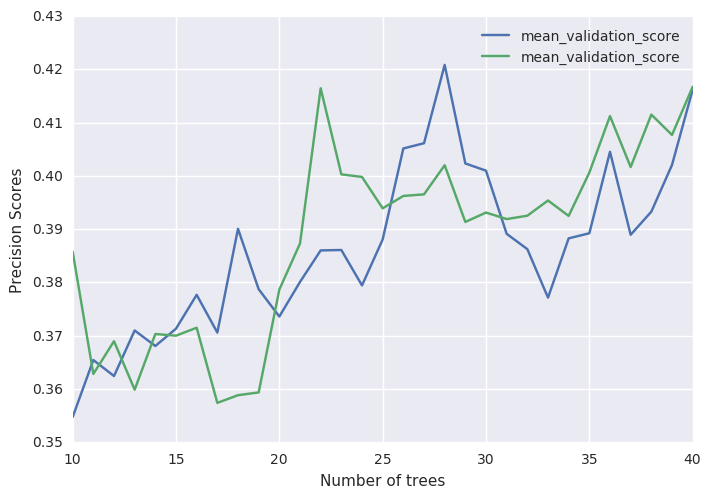

In [30]:
for t in  df_rf.one.unique():
    precision_scores = df_rf['mean_validation_score'][df_rf.one==t]
    plt.plot(df_rf.n_estimators.unique(), precision_scores)
plt.xlabel('Number of trees')
plt.ylabel('Precision Scores')
plt.legend()
plt.savefig('Random_Forest_Precision_vs_Number_of_trees_10-41_2class_weights.jpg')
plt.plot(n_range, grid_mean_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Cross-Validation precision')
plt.savefig('Random_Forest_Precision_vs_Number_of_trees_10-41.jpg')

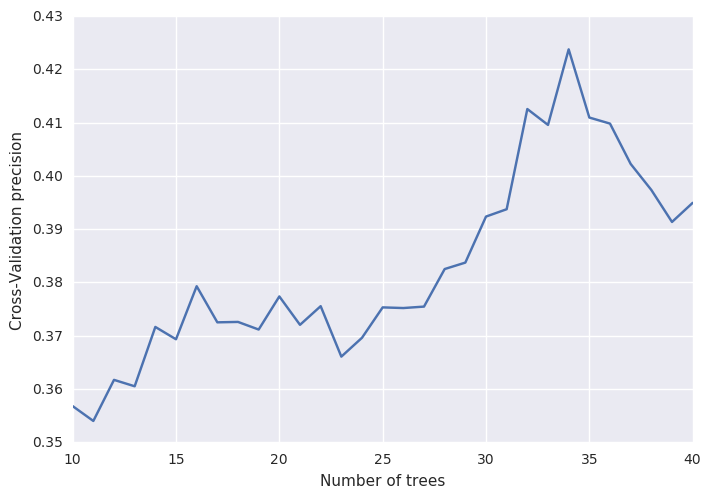

In [11]:
grid_mean_scores = [r.mean_validation_score for r in grid1.grid_scores_]
plt.plot(n_range, grid_mean_scores)
plt.xlabel('Number of trees')
plt.ylabel('Cross-Validation precision')
plt.savefig('RandomForest_10-40trees_precision.jpg')

In [31]:
print grid1.best_score_
print grid1.best_params_
print grid1.best_estimator_

0.420837008844
{'n_estimators': 28, 'class_weight': {0: 0.25, 1: 0.75}}
RandomForestClassifier(bootstrap=True, class_weight={0: 0.25, 1: 0.75},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [36]:
y_pred_rf1 = grid1.predict_proba(X_test)[:,1]

In [37]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf1)
roc_auc = auc(false_positive_rate, true_positive_rate)

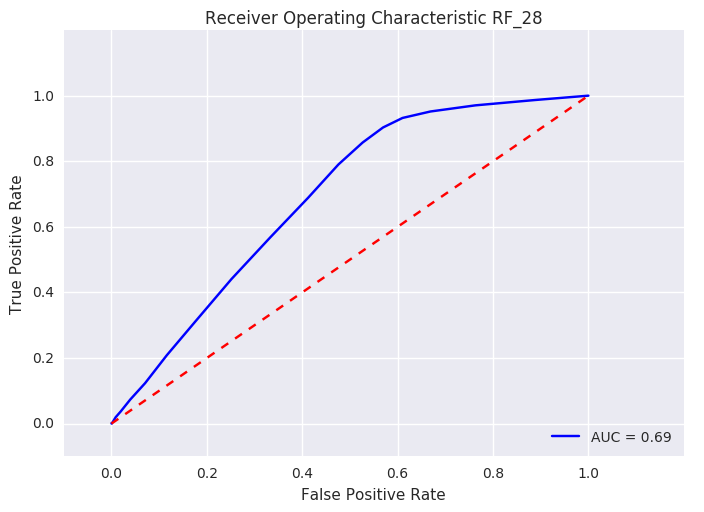

In [38]:
plt.title('Receiver Operating Characteristic RF_28')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('RandomForest_28_0.25-0.75_roc_curve.jpg')

In [1]:
T = float(raw_input())
y_pred_rf1 = pd.Series(y_pred_rf1)
pred_test = y_pred_rf1.map(lambda x: 0 if x<T else 1)
cnf_matrix = confusion_matrix(y_test, pred_test)
df_cm= pd.DataFrame(cnf_matrix, [0,1], [0,1])
g = sns.set(font_scale=1.4)
g = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
fig =g.get_figure()
fig.savefig('confusion_matrix_rfc_t_'+str(T)+'.jpg')

0.53


NameError: name 'pd' is not defined